In [2]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor

from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf
%matplotlib inline

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
from sklearn import svm

In [5]:
# df = pd.read_csv('/content/drive/MyDrive/card_transdata.csv')
df = pd.read_csv('./archive/card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [6]:
print(df.keys())

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')


In [7]:
# Basic Information & Data Description
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df['fraud'].isnull().sum()

0

In [9]:
# Check if any duplicated value exists. It turns out to be zero, and it means there's no duplicates.
df.duplicated().sum()

# Check if there's a null in the dataset. It also turns out to be zero, and it means there's no null on here. 
df.isnull().sum()

# Type Check. All attributes is belonged to a float type  
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

<AxesSubplot:>

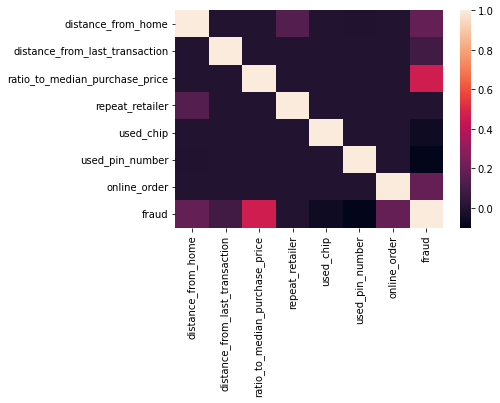

In [10]:
# Correlation Visualization 
sns.heatmap(df.corr())

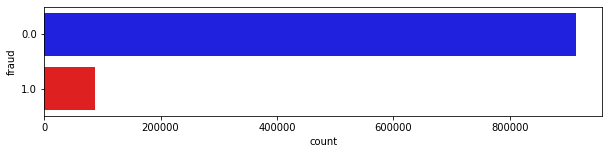

In [11]:
plt.figure(figsize=(10, 2))
fig = sns.countplot(y=df['fraud'],
                    data=df, palette=["blue", "red"])
plt.show()

In [12]:
# Differentiate 
X = df[df.columns.difference(['fraud'])]
y = df["fraud"]
print('X:', X.shape)
# Standardizing the features
#X = StandardScaler().fit_transform(X)

X: (1000000, 7)


In [13]:
X = df[df.columns.difference(['fraud'])]
y = df["fraud"]

In [14]:
# https://github.com/BaekKyunShin/Intro-to-Machine-Learning/blob/master/SVM/SVM.ipynb

red_RGB = (1, 0, 0)
blue_RGB = (0, 0, 1)
data_colors = [red_RGB, blue_RGB]

def read_points_file(filename):
    points = []
    with open(filename, "r") as f:
        for point in f:
            point = point.strip("\n").split()
            points.append([float(point[0]), float(point[1])])
    return points

def read_data(class_0_file, class_1_file):
    points_label0 = read_points_file(class_0_file)
    points_label1 = read_points_file(class_1_file)
    points = points_label0 + points_label1
    points = np.array(points)
    
    label0, label1 = [0], [1]
    num_of_label0, num_of_label1 = len(points_label0), len(points_label1)
    labels = label0 * num_of_label0 + label1 * num_of_label1
    
    return (points, labels)


def plot_data(X_train, y_train, X_test, y_test):
  
    X = np.concatenate((X_train, X_test))
    y = np.concatenate((y_train, y_test))

    colors = get_colors(y)
    colors_train = get_colors(y_train)
    colors_test = get_colors(y_test)

    plt.figure(figsize=(12, 4), dpi=150)

    # Plot all data plot
    plt.subplot(131)
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    plt.title("Data (100%)")


    # training data plot
    plt.subplot(132)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c = colors_train, s = 10, edgecolors=colors_train)
    plt.title("Training Data (80%)")

    # testing data plot
    plt.subplot(133)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c = colors_test, s = 10, edgecolors=colors_test)
    plt.title("Test Data (20%)")
    plt.tight_layout()
    plt.show()

def get_colors(y):
    return [data_colors[int(label)] for label in y]

def plot_decision_function(X_train, y_train, X_test, y_test, clf):
    plt.figure(figsize=(8, 4), dpi=150)
    plt.subplot(121)
    plt.title("Training data")
    plot_decision_function_helper(X_train, y_train, clf)
    plt.subplot(122)
    plt.title("Test data")
    plot_decision_function_helper(X_test, y_test, clf, True)
    plt.show()


def plot_decision_function_helper(X, y, clf, show_only_decision_function = False):
    colors = get_colors(y)
    plt.axis('equal')
    plt.tight_layout()
    #plt.axis('off') 

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=10, edgecolors=colors)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T # xy.shape = (900, 2)
        
    Z = clf.decision_function(xy).reshape(XX.shape)
    # clf.decision_function(xy).shape = (900,)
    # Z.shape = (30, 30)

    if  show_only_decision_function:
    # Plot decision boundary
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
                 linestyles=['-'])
    else :
    # Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])
    # Plot support vectors
    #ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 10,
    #         linewidth=1, facecolors='k', c = 'k', label='Support Vectors')

    #plt.legend(fontsize='small')

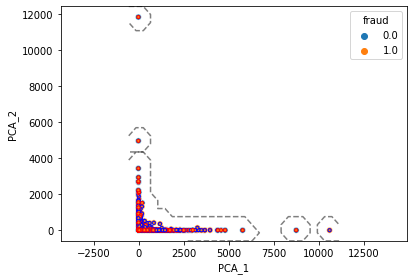

In [15]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principal_components, columns = ['PCA_1', 'PCA_2'])
principal_df.head()

final_df = pd.concat([principal_df, df[['fraud']]], axis=1)

clf = svm.OneClassSVM(nu=0.001, kernel='rbf', gamma=0.0001)
clf.fit(principal_df, df['fraud'])

# Data Visualization 
plt.figure(figsize=(6, 4))
sns.scatterplot(final_df['PCA_1'], final_df['PCA_2'], hue=df['fraud'])
plot_decision_function_helper(
    principal_df, df['fraud'], clf, show_only_decision_function=False)


## 1-SVM(OCSVM)

In [1]:
# train과 test data를 0.005, 0.002 비율로 나눔. 
# SVDD를 이용
# 램이 부족해서 세션이 계속 종료되어서, 데이터를 일부만 사용
# 층화 무작위 추출을 통해 fraud 비율 유지



from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.005,test_size=0.002, random_state=1004, 
                                                    stratify=df['fraud'])

# imbalanced-learn 패키지
print("Displaying data. Close window to continue.")
plot_data(X_train, y_train, X_test, y_test)

# 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
smote = SMOTE(random_state=11)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Displaying data after SMOTE. Close window to continue.")
# Plot data
plot_data(X_train, y_train, X_test, y_test)


NameError: name 'train_test_split' is not defined

In [17]:
#y_train 비율 확인.
y_train.value_counts()

0.0    4563
1.0    4563
Name: fraud, dtype: int64

In [18]:
# nu(=C): Hyperplane(sphere) 밖에 있는 데이터의 최대 비율
# nu가 클수록, 즉 SV(support vector)가 많을 수록 penalty를 많이 먹여서, 정상영역을 원점에서부터 멀리 밀어낼 수 있다.
# e.g: nu=0.9 -> 최대 0.9의 penalty를 부여하겠다.
#      최대 90% 데이터를  전체 데이터의 abnormal이라고 가정하고 hyperplane을 나누겠다.
#svdd에서 nu가 작을수록 원에 가깝고, nu가 클수록 구밖으로 나가는 noraml data가 많아진다.

#gamma: Hyperplane(sphere)구성시 참조하는 거리로, gmmma가 클수록 주변 데이터를 SV로 보고, 
#       gamma가 작을수록 먼거리에 있는 데이터도 SV로 보고 계산함.

In [19]:
clf = svm.OneClassSVM(nu=0.001, kernel='rbf', gamma=0.0001)
#clf = svm.SVC(C=0.001, kernel='rbf', gamma=0.0001)
#clf.fit(X_train)

In [20]:
clf.fit(X_train, y_train)

print("Displaying decision function. Close window to continue.")
# Plot decision function on training and test data
# plot_decision_function(X_train, y_train, X_test, y_test, clf)

# Make predictions on unseen test data
clf_predictions = clf.predict(X_test)
# print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100))

Displaying decision function. Close window to continue.


In [21]:
# Grid Search
print("Performing grid search ... ")

# Parameter Grid
#param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}
param_grid = {'nu': [0.0001, 0.001, 0.01, 0.1, 0.5, 0.99], 'gamma': [
    1, 0.1, 0.01, 0.001, 0.00001, 10]}

# Make grid search classifier
clf_grid = GridSearchCV(svm.OneClassSVM(), param_grid,
                        verbose=1, scoring="accuracy")

# Train the classifier
clf_grid.fit(X_train, y_train)

# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

print("Displaying decision function for best estimator.")
# Plot decision function on training and test data
#plot_decision_function(X_train, y_train, X_test, y_test, clf_grid)

Performing grid search ... 
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters:
 {'gamma': 1e-05, 'nu': 0.001}
Best Estimators:
 OneClassSVM(gamma=1e-05, nu=0.001)
Displaying decision function for best estimator.


In [22]:
y_test

519257    0.0
604953    1.0
998579    0.0
210446    0.0
366762    1.0
         ... 
361993    0.0
958644    0.0
824354    0.0
781668    0.0
440169    0.0
Name: fraud, Length: 2000, dtype: float64

In [23]:
y_pred_train=clf.predict(X_train)

In [24]:
y_pred_test=clf.predict(X_test)
y_pred_test=pd.DataFrame(y_pred_test)
y_pred_test=y_pred_test.replace({-1: 1, 1: 0})
y_pred_test

,0
0,0
1,0
2,0
3,0
4,0
...,...
1995,0
1996,0
1997,0
1998,0


In [25]:
print(accuracy_score(y_pred_test,y_test))
print(precision_score(y_pred_test, y_test))
print(recall_score(y_pred_test, y_test))
print(f1_score(y_pred_test, y_test))


0.915
0.05714285714285714
0.6666666666666666
0.10526315789473684


Text(0.5, 15.0, 'Predicted')

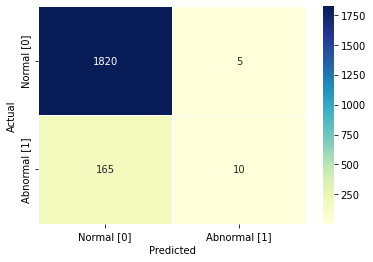

In [26]:
con_mat = confusion_matrix(y_test, y_pred_test)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

## SVDD(Suport Vector Data Description)

In [27]:
from BaseSVDD import BaseSVDD

In [28]:
svdd=BaseSVDD(C=0.001, gamma=0.0001, kernel='rbf',display='on')

In [29]:
X_train_forSVDD=X_train.to_numpy()



*** Fitting of the SVDD model is completed. ***

running time         = 352.4316 seconds
kernel function      = rbf
iterations           = 29
number of samples    = 9126
number of features   = 7
number of SVs        = 1006
ratio of SVs         = 11.0234 %
accuracy             = 96.3949 %




BaseSVDD(C=[0.001, 1], gamma=0.0001)

In [31]:
y_pred_train_forSVDD=svdd.predict(X_train_forSVDD)



*** Prediction of the provided data is completed. ***

running time         = 3.1437 seconds
number of samples    = 9126
number of alarm      = 329




In [32]:
X_test_forSVDD=X_test.to_numpy()
y_pred_test_forSVDD=svdd.predict(X_test_forSVDD)
y_pred_test_forSVDD=pd.DataFrame(y_pred_test_forSVDD)
y_pred_test_forSVDD=y_pred_test_forSVDD.replace({-1: 1, 1: 0})
y_pred_test_forSVDD



*** Prediction of the provided data is completed. ***

running time         = 0.5029 seconds
number of samples    = 2000
number of alarm      = 31




,0
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
1995,0.0
1996,0.0
1997,0.0
1998,0.0


In [33]:
print(accuracy_score(y_pred_test_forSVDD, y_test))
print(precision_score(y_pred_test_forSVDD, y_test))
print(recall_score(y_pred_test_forSVDD, y_test))
print(f1_score(y_pred_test_forSVDD, y_test))


0.911
0.08
0.45161290322580644
0.13592233009708737


Text(0.5, 15.0, 'Predicted')

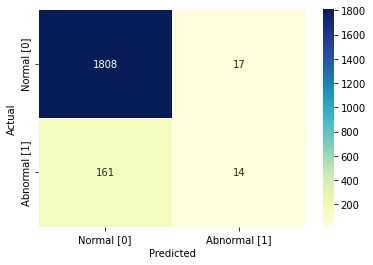

In [34]:
con_mat = confusion_matrix(y_test, y_pred_test_forSVDD)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')